# 4. 신경망 학습

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-손실함수" data-toc-modified-id="1.-손실함수-1">1. 손실함수</a></span><ul class="toc-item"><li><span><a href="#1.1-오차제곱합" data-toc-modified-id="1.1-오차제곱합-1.1">1.1 오차제곱합</a></span></li><li><span><a href="#1.2-교차-엔트로피" data-toc-modified-id="1.2-교차-엔트로피-1.2">1.2 교차 엔트로피</a></span></li><li><span><a href="#1.3-미니배치-학습" data-toc-modified-id="1.3-미니배치-학습-1.3">1.3 미니배치 학습</a></span></li><li><span><a href="#1.4-(배치용)-교차-엔트로피-오차-구현하기" data-toc-modified-id="1.4-(배치용)-교차-엔트로피-오차-구현하기-1.4">1.4 (배치용) 교차 엔트로피 오차 구현하기</a></span></li></ul></li><li><span><a href="#2.-수치-미분" data-toc-modified-id="2.-수치-미분-2">2. 수치 미분</a></span><ul class="toc-item"><li><span><a href="#2.1-미분" data-toc-modified-id="2.1-미분-2.1">2.1 미분</a></span></li><li><span><a href="#2.2-수치-미분의-예" data-toc-modified-id="2.2-수치-미분의-예-2.2">2.2 수치 미분의 예</a></span></li><li><span><a href="#2.3-편미분" data-toc-modified-id="2.3-편미분-2.3">2.3 편미분</a></span></li></ul></li><li><span><a href="#3.-기울기" data-toc-modified-id="3.-기울기-3">3. 기울기</a></span><ul class="toc-item"><li><span><a href="#3.1-경사법" data-toc-modified-id="3.1-경사법-3.1">3.1 경사법</a></span></li><li><span><a href="#3.2-신경망에서의-기울기" data-toc-modified-id="3.2-신경망에서의-기울기-3.2">3.2 신경망에서의 기울기</a></span></li></ul></li><li><span><a href="#4.-학습-알고리즘-구현하기" data-toc-modified-id="4.-학습-알고리즘-구현하기-4">4. 학습 알고리즘 구현하기</a></span><ul class="toc-item"><li><span><a href="#4.1-2층-신경망-클래스-구현하기" data-toc-modified-id="4.1-2층-신경망-클래스-구현하기-4.1">4.1 2층 신경망 클래스 구현하기</a></span></li><li><span><a href="#4.2-미니배치-학습-구현하기" data-toc-modified-id="4.2-미니배치-학습-구현하기-4.2">4.2 미니배치 학습 구현하기</a></span></li><li><span><a href="#4.3-시험-데이터로-평가하기" data-toc-modified-id="4.3-시험-데이터로-평가하기-4.3">4.3 시험 데이터로 평가하기</a></span></li></ul></li></ul></div>

## 1. 손실함수

### 1.1 오차제곱합

In [1]:
import numpy as np

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
np.argmax(y)

2

In [3]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
np.argmax(y)

7

In [6]:
sum_squares_error(np.array(y), np.array(t))

0.5975

### 1.2 교차 엔트로피

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [8]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 1.3 미니배치 학습

In [10]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 1.4 (배치용) 교차 엔트로피 오차 구현하기

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [14]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [15]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 2. 수치 미분

### 2.1 미분

In [16]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x))/h

In [17]:
np.float32(1e-50)

0.0

In [18]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)    # 중앙 차분

### 2.2 수치 미분의 예

In [19]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [20]:
import matplotlib.pyplot as plt
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [21]:
numerical_diff(function_1, 5)

0.1999999999990898

In [22]:
numerical_diff(function_1, 10)

0.2999999999986347

### 2.3 편미분

In [23]:
def function_2(x):
    return np.sum(x**2)

In [24]:
function_2(np.array([2, 3]))

13

In [25]:
def function_tmp1(x0):
    return x0**2 + 4.0**2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [26]:
def function_tmp2(x1):
    return 3.0**2 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 3. 기울기

In [27]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [28]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [29]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [30]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 3.1 경사법

In [31]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

In [32]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [33]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [34]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.001, step_num=100)

array([-2.45570041,  3.27426722])

### 3.2 신경망에서의 기울기

In [35]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)    # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [36]:
net = simpleNet()
print(net.W)

[[-0.08954287 -0.30994891 -1.13924705]
 [ 1.83170111  0.20644176 -1.32837976]]


In [37]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.59480528e+00 -1.71758798e-04 -1.87909001e+00]


In [38]:
np.argmax(p)

0

In [39]:
t = np.array([0, 1, 0])

In [40]:
net.loss(x, t)

1.8051638053240584

In [41]:
def f(W):
    return net.loss(x, t)

In [42]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.48625913 -0.50133124  0.01507212]
 [ 0.72938869 -0.75199687  0.02260817]]


In [43]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW


array([[ 0.48625913, -0.50133124,  0.01507212],
       [ 0.72938869, -0.75199687,  0.02260817]])

## 4. 학습 알고리즘 구현하기

### 4.1 2층 신경망 클래스 구현하기

In [46]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


In [49]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)
print(net.params['W1'].shape,
net.params['b1'].shape,
net.params['W2'].shape,
net.params['b2'].shape)

(784, 100) (100,) (100, 10) (10,)


In [51]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [52]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

(784, 100)

In [53]:
print(
    grads['W1'].shape,
    grads['b1'].shape,
    grads['W2'].shape,
    grads['b2'].shape)

(784, 100) (100,) (100, 10) (10,)


### 4.2 미니배치 학습 구현하기

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7834, 0.7921
train acc, test acc | 0.8737, 0.8768
train acc, test acc | 0.8969666666666667, 0.9016
train acc, test acc | 0.90745, 0.9106
train acc, test acc | 0.9130666666666667, 0.9151
train acc, test acc | 0.9186333333333333, 0.9204
train acc, test acc | 0.9229666666666667, 0.9243
train acc, test acc | 0.9282833333333333, 0.9279
train acc, test acc | 0.9312666666666667, 0.9309
train acc, test acc | 0.9335166666666667, 0.9341
train acc, test acc | 0.9355166666666667, 0.9351
train acc, test acc | 0.9385666666666667, 0.9382
train acc, test acc | 0.9405166666666667, 0.9411
train acc, test acc | 0.9425166666666667, 0.9425
train acc, test acc | 0.9446666666666667, 0.9433
train acc, test acc | 0.9459166666666666, 0.9455


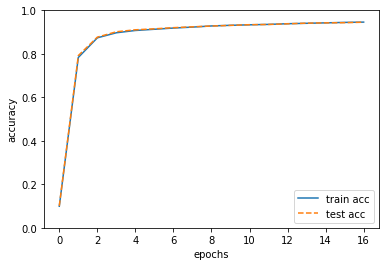

In [55]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
